In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud

In [2]:
# https://www.kaggle.com/uciml/sms-spam-collection-dataset
!wget https://lazyprogrammer.me/course_files/spam.csv

--2023-06-06 12:52:08--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: 'spam.csv'

     0K .......... .......... .......... .......... .......... 10% 4.49M 0s
    50K .......... .......... .......... .......... .......... 20% 10.1M 0s
   100K .......... .......... .......... .......... .......... 30% 7.25M 0s
   150K .......... .......... .......... .......... .......... 40% 11.1M 0s
   200K .......... .......... .......... .......... .......... 50% 13.2M 0s
   250K .......... .......... .......... .......... .......... 60% 14.1M 0s
   300K .......... .......... .......... .......... .......... 71% 19.5M 0s
   350K .......... .......... .......... .......... .......... 81% 19.0M 0s
   400K .......... .......... .......... ........

In [3]:
# file contains some invalid chars depending on which version of pandas
df = pd.read_csv("spam.csv", encoding="ISO-8859-1")

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
# drop unnecessary columns
df =df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
# rename columns
df.columns = ["labels", "data"]
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<Axes: >

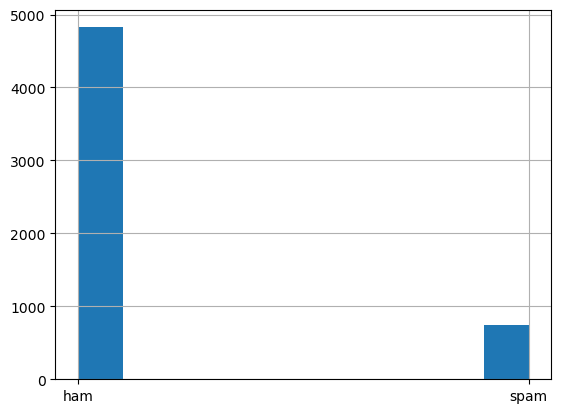

In [7]:
df["labels"].hist()

In [8]:
# create binary labels
df["b_labels"] = df["labels"].map({"ham": 0, "spam": 1})
Y = df["b_labels"].to_numpy()

In [10]:
df.head()

,labels,data,b_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [15]:
# split up the data
df_train, df_test, Ytrain, Ytest = train_test_split(df["data"], Y, test_size=0.33)
df_train

4538    Party's at my place at usf, no charge (but if ...
2938          Are you ok. What happen to behave like this
4592    It's ok i wun b angry. Msg u aft i come home t...
360                Ha ha cool cool chikku chikku:-):-DB-)
2020    Anything lor but toa payoh got place 2 walk me...
                              ...                        
1625    Hi Dear Call me its urgnt. I don't know whats ...
22      So Ì_ pay first lar... Then when is da stock c...
3626    Still chance there. If you search hard you wil...
3969    That's the trouble with classes that go well -...
2245    How did you find out in a way that didn't incl...
Name: data, Length: 3733, dtype: object

In [18]:
# with Tfidf
# featurizer = TfidfVectorizer(decode_error="ignore")
# Xtrain = featurizer.fit_transform(df_train)
# Xtest = featurizer.transform(df_test)

# with CountVectorizer
featurizer = CountVectorizer(decode_error="ignore")
Xtrain = featurizer.fit_transform(df_train)
Xtest = featurizer.transform(df_test)

In [19]:
Xtrain

<3733x6981 sparse matrix of type '<class 'numpy.int64'>'
	with 49245 stored elements in Compressed Sparse Row format>

In [20]:
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train acc: ", model.score(Xtrain, Ytrain))
print("test acc: ", model.score(Xtest, Ytest))

train acc:  0.994374497723011
test acc:  0.9858618814573138


In [21]:
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)
print("train F1:", f1_score(Ytrain, Ptrain))
print("test F1:", f1_score(Ytest, Ptest))

train F1: 0.9786802030456854
test F1: 0.9462809917355371


In [22]:
Prob_train = model.predict_proba(Xtrain)[:,1]
Prob_test = model.predict_proba(Xtest)[:,1]
print("train AUC:", roc_auc_score(Ytrain, Prob_train))
print("test AUC:", roc_auc_score(Ytest, Prob_test))

train AUC: 0.9948489624802975
test AUC: 0.9736989667495726


In [24]:
cm =confusion_matrix(Ytrain, Ptrain)
cm

array([[3230,    9],
       [  12,  482]], dtype=int64)

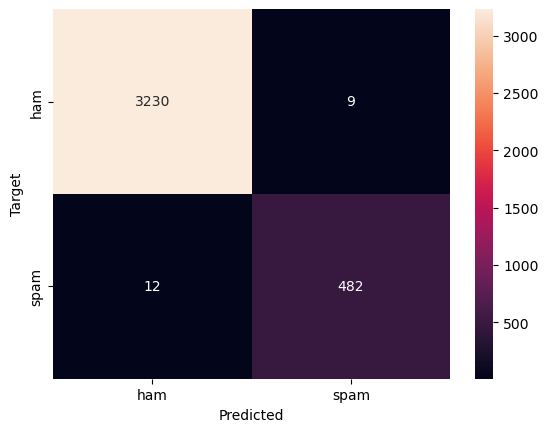

In [25]:
def plot_cm(cm):
    classes = ["ham", "spam"]
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    ax = sn.heatmap(df_cm, annot=True, fmt="g")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Target")

plot_cm(cm)

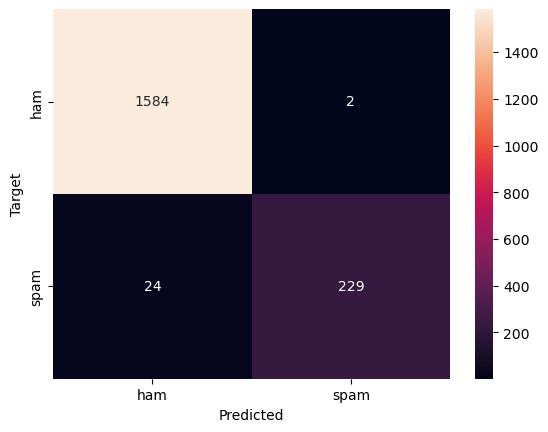

In [26]:
cm_test = confusion_matrix(Ytest, Ptest)
plot_cm(cm_test)

In [29]:
# visualize the data
def visualize(label):
    words = ""
    for msg in df[df["labels"] == label]["data"]:
        msg = msg.lower()
        words += msg + " "
    print(words)
    wordcloud = WordCloud(width=600, height=400).generate(words)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c's apply 08452810075over18's freemsg hey there darling it's been 3 week's now and no word back! i'd like some fun you up for it still? tb ok! xxx std chgs to send, å£1.50 to rcv winner!! as a valued network customer you have been selected to receivea å£900 prize reward! to claim call 09061701461. claim code kl341. valid 12 hours only. had your mobile 11 months or more? u r entitled to update to the latest colour mobiles with camera for free! call the mobile update co free on 08002986030 six chances to win cash! from 100 to 20,000 pounds txt> csh11 and send to 87575. cost 150p/day, 6days, 16+ tsandcs apply reply hl 4 info urgent! you have won a 1 week free membership in our å£100,000 prize jackpot! txt the word: claim to no: 81010 t&c www.dbuk.net lccltd pobox 4403ldnw1a7rw18 xxxmobilemovieclub: to use your credit, click the wap link in the next txt message or c

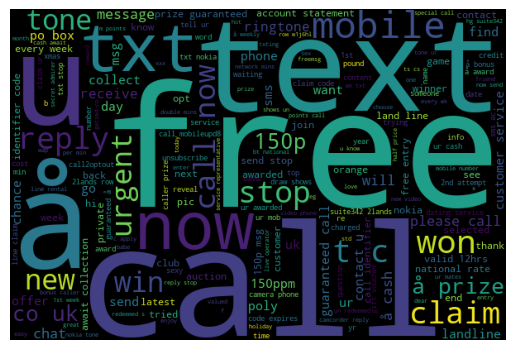

In [30]:
visualize("spam")

ham" not from this campus. are you in the library? the affidavit says  &lt;#&gt;  e twiggs st, division g, courtroom  &lt;#&gt; , &lt;time&gt;  am. i'll double check and text you again tomorrow how will i creep on you now? ;_; tell your friends what you plan to do on valentines day @ &lt;url&gt; if i get there before you after your ten billion calls and texts so help me god purity of friendship between two is not about smiling after reading the forwarded message..its about smiling just by seeing the name. gud evng musthu i've told him that i've returned it. that should i re order it. house-maid is the murderer, coz the man was murdered on  &lt;#&gt; th january.. as public holiday all govt.instituitions are closed,including post office.. depends on where u going lor. and smile for me right now as you go and the world will wonder what you are smiling about and think your crazy and keep away from you ... *grins* lil fever:) now fine:) i think it's all still in my car can a not? yes prince

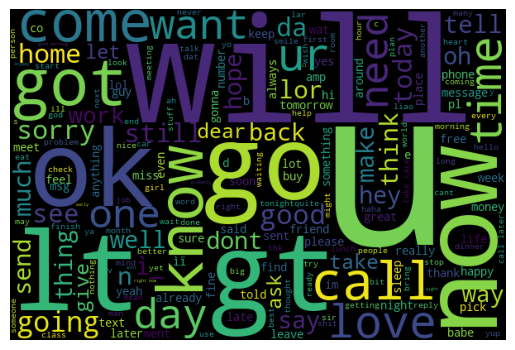

In [31]:
visualize("ham")

In [32]:
# see what were getting wrong
X = featurizer.transform(df["data"])
df["predictions"] = model.predict(X)

In [33]:
# things that should be spam
sneaky_spam = df[(df["predictions"] == 0) & (df["b_labels"] == 1)]["data"]
for msg in sneaky_spam:
    print(msg)

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
Do you realize that in about 40 years, we'll have thousands of old ladies running around with tattoos?
Hello. We need some posh birds and chaps to user trial prods for champneys. Can i put you down? I need your address and dob asap. Ta r
Can U get 2 phone NOW? I wanna chat 2 set up meet Call me NOW on 09096102316 U can cum here 2moro Luv JANE xx Callså£1/minmoremobsEMSPOBox45PO139WA
0A$NETWORKS allow companies to bill for SMS, so they are responsible for their \suppliers\"
Would you like to see my XXX pics they are so hot they were nearly banned in the uk!
More people are dogging in your area now. Call 09090204448 and join like minded guys. Why not arrange 1 yourself. There's 1 this evening. Aå£1.50 minAPN LS278BB
Hi ya babe x u 4goten bout me?' scammers getti

In [34]:
# things that should not be spam
not_actually_spam = df[(df["predictions"] == 1) & (df["b_labels"] == 0)]["data"]
for msg in not_actually_spam:
    print(msg)


Waiting for your call.
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
Hey...Great deal...Farm tour 9am to 5pm $95/pax, $50 deposit by 16 May
Total video converter free download type this in google search:)
Yavnt tried yet and never played original either
Unlimited texts. Limited minutes.
Mathews or tait or edwards or anderson
Have you laid your airtel line to rest?
I liked the new mobile
Nokia phone is lovly..
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us


In [35]:
df.head()

,labels,data,b_labels,predictions
0,ham,"Go until jurong point, crazy.. Available only ...",0,0
1,ham,Ok lar... Joking wif u oni...,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,1
3,ham,U dun say so early hor... U c already then say...,0,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,0
